# Import Statements

In [253]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
plt.rcParams['figure.figsize'] = [14.0, 10.0]
import folium

# Creating Individual Dataframes

In [254]:
df_mumbai = pd.read_csv('UsedCars_Mumbai.csv')
df_delhi = pd.read_csv('UsedCars_Delhi.csv')
df_banglore = pd.read_csv('UsedCars_Banglore.csv')
df_hyderabad = pd.read_csv('UsedCars_Hyderabad.csv')
df_chennai = pd.read_csv('UsedCars_Chennai.csv')
df_pune = pd.read_csv('UsedCars_Pune.csv')
df_kolkata = pd.read_csv('UsedCars_Kolkata.csv')

# Concatinating Them Into One Dataframe

In [255]:
df = pd.concat([df_mumbai, df_delhi, df_banglore, df_hyderabad, df_chennai, df_kolkata, df_pune])

# Dropping Duplicates

In [256]:
df.drop_duplicates(subset = ['full_model_name', 'price', 'distance_travelled(kms)'],keep= = 'last')

SyntaxError: invalid syntax (Temp/ipykernel_18004/4071960234.py, line 1)

# Rearranging The DataFrame

In [257]:
df.drop(df.columns[0], axis=1, inplace=True)
indexes = []
for i in range(0,len(df),1):
    indexes.append(int(i))
df.insert(0, 'Id', indexes)
df.set_index('Id', inplace=True)

# Viewing The First 5 Rows Of DataFrame

In [258]:
df.head(5)

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city
Id,,,,,,,,
0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai
1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai
2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane
3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai
4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai


# Dataset Info

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 0 to 1724
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1725 non-null   int64  
 1   brand                    1725 non-null   object 
 2   full_model_name          1725 non-null   object 
 3   model_name               1725 non-null   object 
 4   price                    1725 non-null   float64
 5   distance_travelled(kms)  1725 non-null   float64
 6   fuel_type                1725 non-null   object 
 7   city                     1725 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 121.3+ KB


In [260]:
df.describe()

,year,price,distance_travelled(kms)
count,1725.000000,1.725000e+03,1725.000000
mean,2015.390725,1.494837e+06,53848.256232
std,3.207504,1.671658e+06,44725.541963
min,1990.000000,6.250000e+04,350.000000
25%,2013.000000,5.450000e+05,29000.000000
50%,2016.000000,8.750000e+05,49000.000000
75%,2018.000000,1.825000e+06,70500.000000
max,2021.000000,1.470000e+07,790000.000000


# Checking For Empty Values

In [261]:
df.isnull().sum()

year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
dtype: int64

<AxesSubplot:ylabel='Id'>

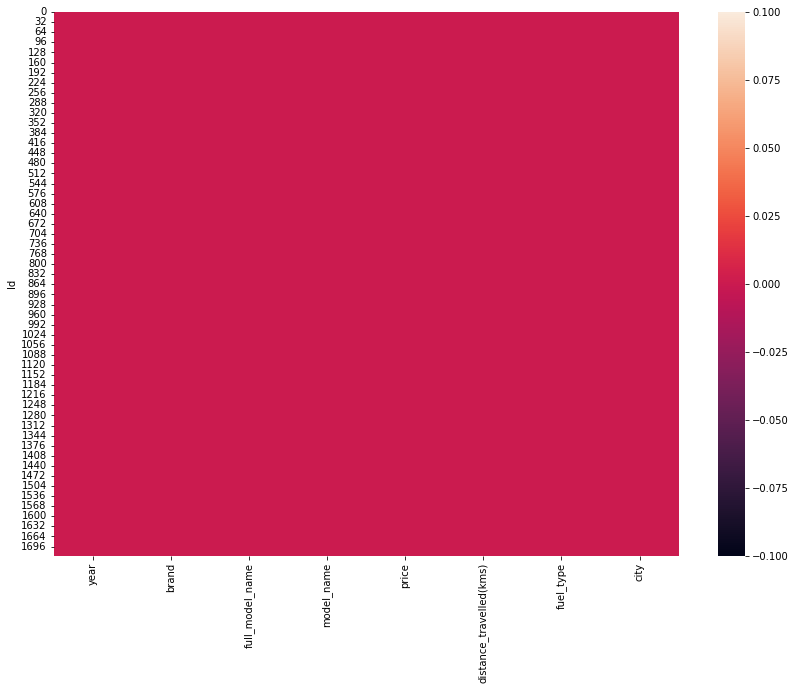

In [262]:
sns.heatmap(df.isnull())

In [263]:
# Hence No Empty Values Detetcted : Immaculate Dataset

# Exploring The Columns

In [264]:
df.columns

Index(['year', 'brand', 'full_model_name', 'model_name', 'price',
       'distance_travelled(kms)', 'fuel_type', 'city'],
      dtype='object')

In [265]:
df[df.columns[0]].unique()

array([2016, 2012, 2017, 2019, 2018, 2015, 2010, 2013, 2014, 2020, 2009,
       2006, 2021, 2008, 2011, 2007, 2005, 2004, 1990], dtype=int64)

c:\users\sanje\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='year', ylabel='count'>

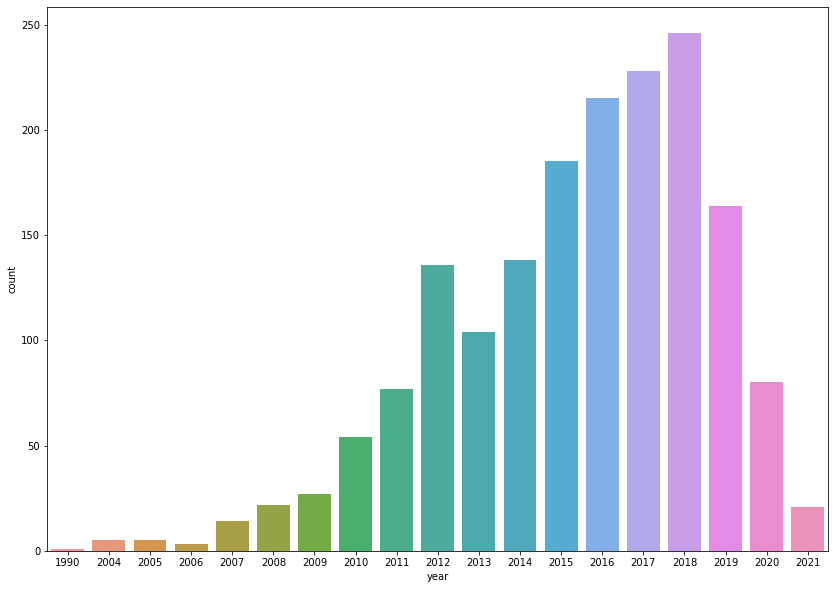

In [266]:
sns.countplot(df[df.columns[0]]) #column = year

In [267]:
fig = px.histogram(df, x="brand", nbins=10)
fig.show()

In [268]:
fig = px.histogram(df, x="fuel_type")
fig.show()

# Plots For kms driven and price

In [269]:
fig = px.box(df, y="price")
fig.show()

In [270]:
fig = px.violin(df, y="price")
fig.show()

In [271]:
fig = px.box(df, y="distance_travelled(kms)")
fig.show()

In [272]:
fig = px.violin(df, y="distance_travelled(kms)")
fig.show()

# Number Of Cars Per City

In [273]:
fig = px.histogram(df, x="city", nbins=20)
fig.show()

# Brand Per City

In [274]:
fig = px.histogram(df, x="city",color='brand' )
fig.show()

#  Brands Vs Kms Driven

In [275]:
df.columns

Index(['year', 'brand', 'full_model_name', 'model_name', 'price',
       'distance_travelled(kms)', 'fuel_type', 'city'],
      dtype='object')

In [276]:
fig = px.scatter(x=df['brand'], y=df['distance_travelled(kms)'])
fig.show()

# Most Costliest Brands

In [277]:
fig = px.scatter(x=df['brand'], y=df['price'])
fig.show()

# Price Vs kms Driven

In [278]:
fig = px.scatter(x=df['distance_travelled(kms)'], y=df['price'], symbol=df['brand'], labels={'x' : 'Kms Driven', 'y' : 'Price(Rs)'})
fig.show()

In [279]:
fig = px.density_contour(df, x="distance_travelled(kms)", y="price", marginal_x="histogram", marginal_y="histogram")

fig.show()

# City Vs Kms Driven 

In [280]:
fig = px.scatter(x=df['distance_travelled(kms)'], y=df['city'],labels={'y' : 'City', 'x' : 'Distance(km)'})
fig.show()

# Adding New Column : Effective Buy

In [281]:
df['Ratio(kms*price)'] = df['distance_travelled(kms)']*df['price']/1000000 #cars with lowest ratio are most effective buy

In [282]:
fig = px.box(df, y="Ratio(kms*price)")
fig.show()

In [283]:
temp = df.sort_values(by = 'Ratio(kms*price)')

# Top 10 Effective Buys As Per Ratio

In [284]:
# The cars with least kms driven and least price
# Lesser the ratio  more effective the purchase

In [287]:
temp.head(10)

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,Ratio(kms*price)
Id,,,,,,,,,
195,2021,Maruti Suzuki,Maruti Suzuki Baleno Delta Automatic,Baleno,900000.0,350.0,Petrol,Mumbai,315.00
30,2016,Tata,Tata Nano Twist XT,Nano,215000.0,2814.0,Petrol,Mumbai,605.01
958,2020,Maruti Suzuki,Maruti Suzuki Alto 800 Lxi (Airbag) [2012-2015],Alto,395000.0,1600.0,Petrol,Hyderabad,632.00
1252,2010,Tata,Tata Nano LX,Nano,80000.0,10001.0,Petrol,Chennai,800.08
1006,2010,Tata,Tata Nano LX,Nano,80000.0,10001.0,Petrol,Chennai,800.08
382,2021,Mahindra,Mahindra Thar LX 4-STR Convertible Petrol AT,Thar,1811000.0,490.0,Petrol,Delhi,887.39
363,2012,Tata,Tata Aria Pure 4x2,Aria,425000.0,2700.0,Diesel,Delhi,1147.50
281,2012,Tata,Tata Nano Base,Nano,65000.0,18000.0,Petrol,Ghaziabad,1170.00
1680,2013,Tata,Tata Nano LX,Nano,140000.0,10000.0,Petrol,Pune,1400.00
